In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn')

# EDA

In [2]:
df_telco = pd.read_csv('Telco-Customer-Churn.csv')
df_telco.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [3]:
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df_telco['TotalCharges'] = pd.to_numeric(df_telco['TotalCharges'], errors='coerce')
df_telco.dropna(inplace=True)
df_telco.drop(columns='customerID', inplace=True)

In [5]:
df_telco['PaymentMethod'] = df_telco['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

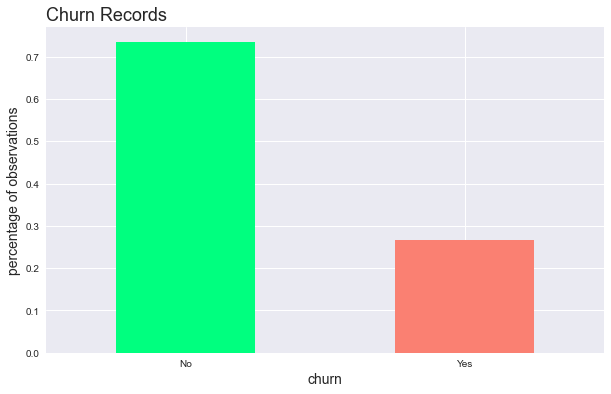

In [6]:
# create a figure
fig = plt.figure(figsize=(10, 6)) 
ax = fig.add_subplot(111)

# proportion of observation of each class
prop_response = df_telco['Churn'].value_counts(normalize=True)

# create a bar plot showing the percentage of churn
prop_response.plot(kind='bar', 
                   ax=ax,
                   color=['springgreen','salmon'])

# set title and labels
ax.set_title('Churn Records',  fontsize=18, loc='left')
ax.set_xlabel('churn',  fontsize=14)
ax.set_ylabel('percentage of observations', fontsize=14)
ax.tick_params(rotation='auto')

# Feature Importance

In [7]:
from sklearn.metrics import mutual_info_score
def compute_mutual_information(cat_var):
    return mutual_info_score(cat_var, df_telco['Churn'])

In [8]:
variables = df_telco.select_dtypes(include=object).drop('Churn', axis=1)

In [9]:
feature_importance = variables.apply(compute_mutual_information).sort_values(ascending=False)

In [10]:
feature_importance

Contract            0.098182
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64

In [11]:
df_telco_transformed = df_telco.copy()

df_telco_transformed['gender'] = df_telco_transformed['gender'].map({'Female': 1, 'Male': 0})

# label encoding (binary variables)
label_encoding_columns = ['Partner', 'Dependents', 'PaperlessBilling', 'PhoneService', 'Churn']


# encode categorical binary features using label encoding
for column in label_encoding_columns:
    df_telco_transformed[column] = df_telco_transformed[column].map({'Yes': 1, 'No': 0}) 

# one-hot encoding (categorical variables with more than two levels)
one_hot_encoding_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                            'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod']

# encode categorical variables with more than two levels using one-hot encoding
df_telco_transformed = pd.get_dummies(df_telco_transformed, columns = one_hot_encoding_columns)

In [12]:
from sklearn.preprocessing import StandardScaler
min_max_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()

In [13]:
df_telco_transformed[min_max_columns] = scaler.fit_transform(df_telco_transformed[min_max_columns])

In [14]:
X = df_telco_transformed.drop('Churn', axis=1)
y = df_telco_transformed.Churn

In [15]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

# Build a classification model using various methods

In [16]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [17]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',max_iter=-1),
        'params' : {
            'C': [1,10,20],
#             'kernel': ['linear', 'rbf',],
            #'shrinking':['True', 'False']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,100],
            'max_depth': [1,2,3,4,5,6],
            'min_samples_leaf': [100,200,300,500,1000]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(multi_class='auto'),
        'params': {
            'C': [1,5,10],
            'solver':['newton-cg', 'liblinear']
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'kneighbours': {
        'model': KNeighborsClassifier(n_jobs=-1),
        "params": {
            
            'n_neighbors' : [5, 10 , 100],
        }
    },
    'Xgboost': {
        'model': XGBClassifier(n_jobs=-1),
        "params": {
            'n_estimators': [100, 115, 150],
            'max_depth': [3,4,5,6, 10],
#                    'max_features': [None, 'auto', 'sqrt', 'log2'], 
#                    'min_samples_split': [2, 3, 4, 5, 10]
           
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(n_jobs=-1),
        "params": {
            'n_estimators': [1,5,10,100],
            'max_depth': [1,2,3,4,5,6],
            'num_leaves': [100,200,300,500,1000]
        }
    },

}

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10)
scores = []

for model_name, mp in model_params.items():
    print(model_name)
    clf =  GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_.round(4),
        'best_params': clf.best_params_
    })

In [19]:
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df.sort_values('best_score', ascending=False)

,model,best_score,best_params
6,LightGBM,0.8066,"{'max_depth': 2, 'n_estimators': 100, 'num_lea..."
5,Xgboost,0.8046,"{'max_depth': 3, 'n_estimators': 100}"
2,logistic_regression,0.8043,"{'C': 5, 'solver': 'liblinear'}"
0,svm,0.8013,{'C': 1}
4,kneighbours,0.7985,{'n_neighbors': 100}
1,random_forest,0.7969,"{'max_depth': 6, 'min_samples_leaf': 100, 'n_e..."
3,naive_bayes_gaussian,0.6914,{}


Logistic Regression is able to provide a very comparable accuracy to the more complicated models such as LightGBM and XGBoost.

## Using Logistic

In [45]:
lr = LogisticRegression(C=5, solver='liblinear')

In [46]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    lr.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(lr.score(x_test_fold, y_test_fold))
#     print(train_index, test_index)

lst_accu_stratified = [round(x,4) for x in lst_accu_stratified]

# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',    max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',      round(np.mean(lst_accu_stratified), 4)*100, '%')
print('\nStandard Deviation is:', round(np.std(lst_accu_stratified), 4))

List of possible accuracy: [0.7969, 0.8097, 0.8065, 0.8222, 0.7824, 0.7937, 0.8137, 0.8108, 0.8009, 0.8065]

Maximum Accuracy That can be obtained from this model is: 82.22 %

Minimum Accuracy: 78.24 %

Overall Accuracy: 80.43 %

Standard Deviation is: 0.0107


## Freature Reduction

### With RFE

In [22]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import RFE

rfr = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=rfr, step=1)

In [23]:
rfe = rfe.fit(X, y)

In [24]:
X_rfe = X.loc[:, rfe.support_]

In [25]:
lr = LogisticRegression(C=5, solver='liblinear')

In [47]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, )
lst_accu_stratified = []
  
for train_index, test_index in skf.split(X_rfe, y):
    x_train_fold, x_test_fold = X_rfe.iloc[train_index], X_rfe.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    lr.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(lr.score(x_test_fold, y_test_fold))
#     print(train_index, test_index)

lst_accu_stratified = [round(x,4) for x in lst_accu_stratified]

# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',    max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',      round(np.mean(lst_accu_stratified), 4)*100, '%')
print('\nStandard Deviation is:', round(np.std(lst_accu_stratified), 4))

List of possible accuracy: [0.7926, 0.8068, 0.8051, 0.8222, 0.7881, 0.7923, 0.8137, 0.8037, 0.8051, 0.8094]

Maximum Accuracy That can be obtained from this model is: 82.22 %

Minimum Accuracy: 78.81 %

Overall Accuracy: 80.39 %

Standard Deviation is: 0.0099


With only half of the columns of the original dataset, model is able to provide the same level of accuracy. This will help with the curse of the dimensionity curse.

### With PCA

In [27]:
from sklearn.decomposition import PCA

pca = PCA(0.8)
X_pca = pca.fit_transform(X)

In [48]:
lr = LogisticRegression(C=5, solver='liblinear')

In [50]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, )
lst_accu_stratified = []
  
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X_pca[train_index], X_pca[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    lr.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(lr.score(x_test_fold, y_test_fold))
#     print(train_index, test_index)

lst_accu_stratified = [round(x,4) for x in lst_accu_stratified]

# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',    max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',      round(np.mean(lst_accu_stratified), 4)*100, '%')
print('\nStandard Deviation is:', round(np.std(lst_accu_stratified), 4))

List of possible accuracy: [0.7912, 0.8097, 0.7937, 0.8236, 0.7866, 0.7838, 0.8151, 0.8009, 0.7909, 0.8065]

Maximum Accuracy That can be obtained from this model is: 82.36 %

Minimum Accuracy: 78.38000000000001 %

Overall Accuracy: 80.02 %

Standard Deviation is: 0.0125


Retaining only 80% of the information, there is only a drop of half a percent. 

## Using Keras

In [30]:
import tensorflow as tf

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y)

In [69]:
inputs = tf.keras.layers.Input(shape=(None,40))

# Neural network layers
hidden1 = tf.keras.layers.Dense(128, activation='sigmoid')(inputs)
dropout1 = tf.keras.layers.Dropout(0.1, name="dropout")(hidden1)
hidden2 = tf.keras.layers.Dense(64, activation='sigmoid')(dropout1)
dropout2 = tf.keras.layers.Dropout(0.1, name="dropout2")(hidden2)
hidden3 = tf.keras.layers.Dense(16, activation='sigmoid')(dropout2)
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(hidden3)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[inputs], outputs = [l])

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None, 40)]        0         
                                                                 
 dense_12 (Dense)            (None, None, 128)         5248      
                                                                 
 dropout (Dropout)           (None, None, 128)         0         
                                                                 
 dense_13 (Dense)            (None, None, 64)          8256      
                                                                 
 dropout2 (Dropout)          (None, None, 64)          0         
                                                                 
 dense_14 (Dense)            (None, None, 16)          1040      
                                                                 
 output (Dense)              (None, None, 1)           17  

In [70]:
model.compile(optimizer='adam',  loss='binary_crossentropy', metrics=['accuracy'])

### Training 

In [71]:
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
165/165 [==============================] - 1s 3ms/step - loss: 0.5206 - accuracy: 0.7450
Epoch 2/5
165/165 [==============================] - 1s 3ms/step - loss: 0.4368 - accuracy: 0.7928
Epoch 3/5
165/165 [==============================] - 1s 4ms/step - loss: 0.4340 - accuracy: 0.7920
Epoch 4/5
165/165 [==============================] - 1s 4ms/step - loss: 0.4301 - accuracy: 0.7937
Epoch 5/5
165/165 [==============================] - 1s 4ms/step - loss: 0.4261 - accuracy: 0.7952


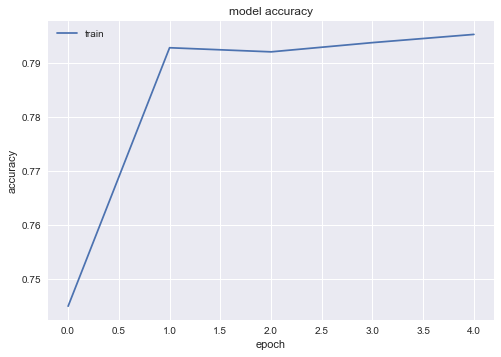

In [72]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

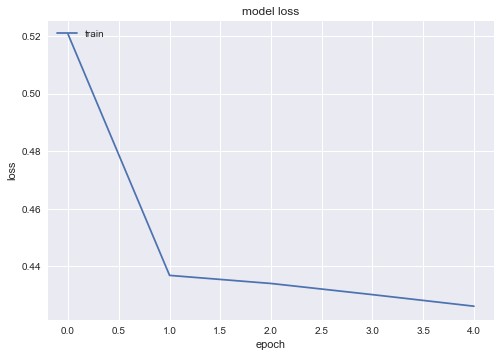

In [73]:
# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Evalulate

In [74]:
model.evaluate(X_test, y_test)

55/55 [==============================] - 1s 3ms/step - loss: 0.4253 - accuracy: 0.7981


[0.4253391921520233, 0.7980659604072571]

In [75]:
y_pred = model.predict(X_test)

In [76]:
binary_predictions = []

for i in y_pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0)

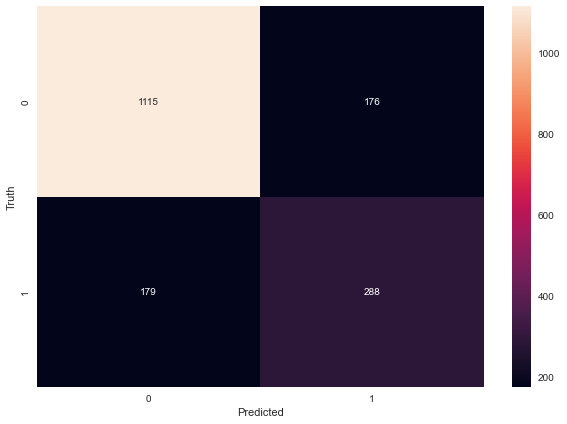

In [77]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

cm = confusion_matrix(y_test, binary_predictions)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [79]:
from sklearn.metrics import classification_report

print(classification_report(y_test, binary_predictions))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1291
           1       0.62      0.62      0.62       467

    accuracy                           0.80      1758
   macro avg       0.74      0.74      0.74      1758
weighted avg       0.80      0.80      0.80      1758



## Using LSTM

In [ ]:
inputs = tf.keras.layers.Input(shape=(None,40))

# Neural network layers
hidden1 = tf.keras.layers.Dense(128, activation='sigmoid')(inputs)
dropout1 = tf.keras.layers.Dropout(0.1, name="dropout")(hidden1)
hidden2 = tf.keras.layers.LSTM(64, activation='sigmoid')(dropout1)
dropout2 = tf.keras.layers.Dropout(0.1, name="dropout2")(hidden2)
hidden3 = tf.keras.layers.Dense(16, activation='sigmoid')(dropout2)
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(hidden3)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[inputs], outputs = [l])

model.summary()

In [ ]:
model.compile(optimizer='adam',  loss='binary_crossentropy', metrics=['accuracy'])

### Training 

In [ ]:
history = model.fit(X_train, y_train, epochs=5)

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Evalulate

In [ ]:
model.evaluate(X_test, y_test)